# Homework 2: Coding

**Due Monday September 28th, 11:59pm.**

**This assignment can be done individually or in groups of two**

**Submit hw2.ipynb to Gradescope (One per group and don't forget to add your partner's name)**

### Imports and Data

In [1]:
"""
Import required libraries.

DON'T comment out these imports when submitting your final hw2.py file.
"""
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

In [2]:
"""
FOR COLAB USERS ONLY

Run the following code to upload and unzip the data into the Colab environment.

Please comment out *everything* in this cell (including the import) when submitting your .py file.
"""
# from google.colab import files
# uploaded = files.upload()
# ! unzip hw2_data.zip

'\nFOR COLAB USERS ONLY\n\nRun the following code to upload and unzip the data into the Colab environment.\n\nPlease comment out *everything* in this cell (including the import) when submitting your .py file.\n'

## Q1: Least Squares Regression

Implement the following functions for question 1. Please **do not** use the sklearn implementation of linear regression or other imports beyond those listed above.

### L1 and L2 error

In [3]:
def L2_error(y, y_hat):
    """
    L2 error loss
    
    Args:
    y ((n,1) np.array): actual labels
    y_hat ((n,1) np.array): estimated labels
    
    Returns:
        float: L2 error
    """
    n = y.shape[0]
    diff = y - y_hat
    L2_error = np.sum(np.square(diff))/n
    return L2_error



def L1_error(y, y_hat):
    """
    L1 error loss
    
    Args:
    y ((n,1) np.array): actual labels
    y_hat ((n,1) np.array): estimated labels
    
    Returns:
        float: L1 error
    """
    n = y.shape[0]
    diff = y - y_hat
    L1_error = np.sum(np.absolute(diff))/n
    
    return L1_error

### Least Square Regression

In [4]:
def LinearRegression(train_data, train_labels):
    """
    Runs OLS on the given data.
    
    Args:
        train_data ((n,p) np.array): n is the number of training points and p the number of features
        train_labels ((n,1) np.array): training labels for the training data    
    
    Returns
        tuple: (w, b) where w is a (p,1) weight vector, and b the bias term     
    """
    (n, p) = train_data.shape
    X = np.ones((n, p+1))
    
    X[:, 1:] = train_data
    a = np.linalg.inv(np.dot(X.T, X))
    b = np.dot(X.T, train_labels)
    
    W = np.dot(a, b)
    
    w = W[1:, :]
    b = W[0, 0]
    
    return (w,b)

### Ridge Regression

In [5]:
def LinearRegressionL2(train_data, train_labels, lambda_):
    """
    Runs linear regression with L2 regularization (ridge) on the given data.
    
    Args:
        train_data ((n,p) np.array): n is the number of training points and p the number of features
        train_labels ((n,1) np.array): training labels for the training data    
        lambda_  (float): scalar weighting the L2 penalty

    Returns
        tuple: (w, b) where w is a (p,1) weight vector, and b the bias term  
    """
    n = train_data.shape[0]
    p = train_data.shape[1]
    
    X = np.ones((n, p+1))
    X[:, 1:] = train_data
    
    a = np.linalg.inv(np.dot(X.T, X) + lambda_*n*np.eye(p+1))
    b = np.dot(X.T, train_labels)
    
    W = np.dot(a, b)
    
    w = W[1:, :]
    b = W[0, 0]
    
    return (w,b)

### Q1.1.1: Learning Curve

Use your implementation of (unregularized) least squares regression to learn a regression model from 10$\%$ of the training data, then 20$\%$ of the training data, then 30$\%$ and so on up to 100$\%$ (separate files containing r$\%$ of the training examples are provided under the folder for this problem with file names **Data-set-1/Train-subsets/X$\_$train$\_$r$\%$.txt**, and the corresponding labels are provided with the file names **y$\_$train$\_$r$\%$.txt** in the same folder). In each case, measure both the $L_1$ and $L_2$ error on the training examples used, as well as the error on the given test set. Plot a curve showing both errors (on the *y-axis* as a function of the number of training examples used (on the *x-axis*).

Add the resulting curve to your Latex document.

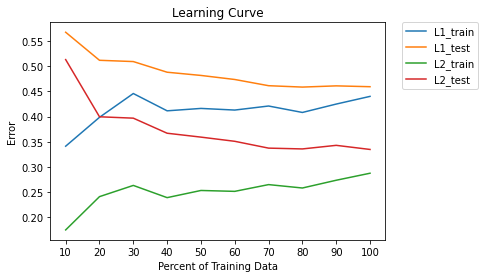

In [27]:
"""
Please remember to comment out all code not contained within a function before 
submitting your file.
"""

X_test = pd.read_csv('hw2_data/Data-set-1/X_test.txt', header=None).values
y_test = pd.read_csv('hw2_data/Data-set-1/y_test.txt', header=None).values

#TODO your code here: Question 1.1.1.
L1_train_errors = []
L2_train_errors = []
L1_test_errors = []
L2_test_errors = []

for subset in range(10, 110, 10):
    X_train = pd.read_csv('hw2_data/Data-set-1/Train-subsets/X_train_'+str(subset)+'_.txt', header=None).values
    y_train = pd.read_csv('hw2_data/Data-set-1/Train-subsets/y_train_'+str(subset)+'_.txt', header=None).values

    (w, b) = LinearRegression(X_train, y_train)
    y_pred_train = np.dot(X_train, w) + b
    y_pred_test = np.dot(X_test, w) + b
    
    L1_error_train = L1_error(y_train, y_pred_train)
    L1_error_test = L1_error(y_test, y_pred_test)
    L1_train_errors.append(L1_error_train)
    L1_test_errors.append(L1_error_test)
    
    L2_error_train = L2_error(y_train, y_pred_train)
    L2_error_test = L2_error(y_test, y_pred_test)
    L2_train_errors.append(L2_error_train)
    L2_test_errors.append(L2_error_test)    
    
plt.plot(range(10),L1_train_errors, label ='L1_train')
plt.plot(range(10),L1_test_errors, label ='L1_test')
plt.plot(range(10),L2_train_errors, label = 'L2_train')
plt.plot(range(10),L2_test_errors, label = 'L2_test')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Learning Curve")
plt.xlabel("Percent of Training Data")
plt.xticks(range(10), range(10,101,10))
plt.ylabel("Error")
plt.show()

### Q1.1.2: Analysis of model learned from full training data

Write down the weight and bias terms, $\hat{w}$ and $\hat{b}$, learned from the full training data in your Latex document. Also, write down the $L_2$ training and test error of this model. In a single figure, draw a plot of the learned linear function (input instance on the *x-axis* and the predicted value on the *y-axis*), along with a scatter plot depicting the true label associated with each test instance.

Add the resulting plot to your Latex document.

w:  [[-2.23442304]]
b:  1.1671738819238153
L2 training error: 0.2876339586619919
L2 test error    : 0.33475968697353337


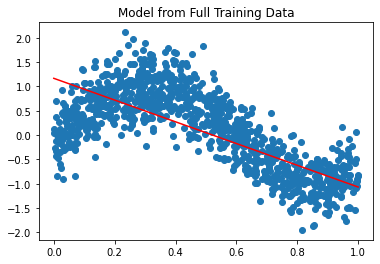

In [28]:
"""
Please remember to comment out all code not contained within a function before 
submitting your file.
"""

X_test = pd.read_csv('hw2_data/Data-set-1/X_test.txt', header=None).values
y_test = pd.read_csv('hw2_data/Data-set-1/y_test.txt', header=None).values
X_train = pd.read_csv('hw2_data/Data-set-1/X_train.txt',header=None).values
y_train = pd.read_csv('hw2_data/Data-set-1/y_train.txt', header=None).values

#TODO your code here: Question 1.1.2.
(w, b) = LinearRegression(X_train, y_train)

print('w: ', w)
print('b: ', b)

y_pred_train = np.dot(X_train, w) + b
y_pred_test = np.dot(X_test, w) + b

L2_error_train = L2_error(y_train, y_pred_train)
L2_error_test = L2_error(y_test, y_pred_test)
print('L2 training error:', L2_error_train)
print('L2 test error    :', L2_error_test)

x = np.linspace(0,1)
plt.plot(x,(x * w + b).T, color='red')
plt.scatter(X_test, y_test)
plt.title('Model from Full Training Data')
plt.show()

### Q1.2.1-2: Regression on different portions of training data

#### Regression on 5$\%$ of the training data. 
Use your implementation of $L_2$-regularized least squares regression to learn a model on 5$\%$ of the training data. Select the regularization parameter from the range $\{$0.1,1,10,50,100,150,200,500,1000,2500,5000$\}$ using 5-fold cross validation on the relevant training data. Draw a plot showing $\lambda$ on the *x-axis* and the training, test, and cross validation errors on the *y-axis* using the $L_2$ error. 

Then record the chosen value of $\lambda$ along with the weight vector, bias term, and all corresponding errors for the chosen value of $\lambda$.
        
#### Regression on 100$\%$ of the training data.

Repeat the above process, but instead learn from the full training data for $L_2$-regularized regression. Plot all of the errors, and record the chosen value of $\lambda$ along with the weight vector, bias term, and all corresponding errors for the chosen value of $\lambda$.

Add the resulting curves to your Latex document.

lambda:  0.1  b:  -3064.11067472829
w: [[ 3.38723280e+03]
 [ 7.58457227e+03]
 [ 2.69630490e+03]
 [-6.17752959e+01]
 [ 3.01287546e+02]
 [-2.03570908e+01]
 [ 1.48763631e+02]
 [ 5.06386976e+04]]
training error 4418834306.376352
test error 8020741257.03428
val error 4856822219.80739
lambda:  1  b:  -322.9294795707028
w: [[ 3.61806032e+02]
 [-2.60621385e+01]
 [ 2.01262900e+03]
 [-2.06156978e+01]
 [ 6.68992873e+01]
 [-4.15818522e+01]
 [ 2.30550879e+02]
 [ 3.43252270e+04]]
training error 5072388878.637431
test error 7398857669.114992
val error 5416593266.376788
lambda:  10  b:  -4.2592675631378825
w: [[-1134.51758832]
 [-1754.28533876]
 [ 1699.61394948]
 [   40.86192117]
 [ -273.19886652]
 [  -63.76819327]
 [  326.58170817]
 [ 8959.53553786]]
training error 8173707883.9974165
test error 10250865706.227457
val error 13507755947.783104
lambda:  50  b:  8.02121946160571
w: [[-1024.38972486]
 [ -357.49783523]
 [ 1404.1006543 ]
 [   53.87402863]
 [ -347.28116174]
 [  -66.51514637]
 [  344.94409519

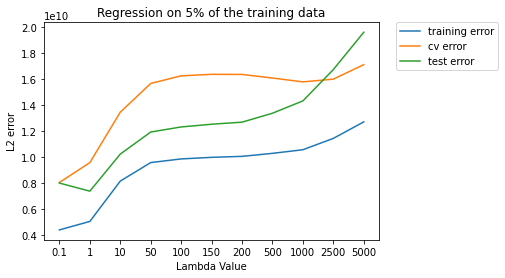

lambda:  0.1  b:  -1727.2134438706562
w: [[-1.33350946e+03]
 [-5.25444158e+03]
 [ 1.50281613e+03]
 [-3.44638514e+01]
 [ 1.52907091e+02]
 [-3.01196974e+01]
 [ 1.15840351e+02]
 [ 4.78933125e+04]]
training error 5736263552.429791
test error 5152682299.804243
val error 6672178868.376767
lambda:  1  b:  -137.298417006823
w: [[-2.12497619e+03]
 [-6.43086438e+03]
 [ 1.41497391e+03]
 [-1.31215802e+01]
 [ 4.74820830e+01]
 [-3.78441335e+01]
 [ 1.46220787e+02]
 [ 3.36735142e+04]]
training error 6273858765.89447
test error 5841874624.468802
val error 7085308065.385886
lambda:  10  b:  14.792671889095487
w: [[-1768.1243979 ]
 [-2620.44118793]
 [ 1329.7825372 ]
 [   22.5670311 ]
 [ -127.87839647]
 [  -49.04517495]
 [  192.09749505]
 [ 8825.9549752 ]]
training error 9435947424.455523
test error 10063361257.64896
val error 10322755786.423218
lambda:  50  b:  12.776355785473413
w: [[-1364.6412896 ]
 [ -417.6146763 ]
 [ 1132.72206638]
 [   31.42716034]
 [ -172.72900784]
 [  -51.43402579]
 [  203.3805005

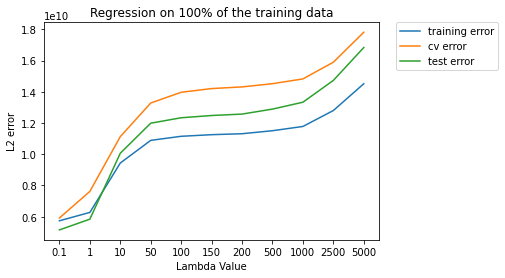

In [29]:
"""
Please remember to comment out all code not contained within a function before 
submitting your file.
"""

for i in [5, 100]:
    lambda_ = [0.1,1,10,50,100,150,200,500,1000,2500,5000]
    train_error = []
    test_error = []
    cv_error = []
    val_error = 0
    X_test = pd.read_csv('hw2_data/Data-set-2/X_test',header=None).values
    y_test = pd.read_csv('hw2_data/Data-set-2/y_test',header=None).values
    X_train = pd.read_csv('hw2_data/Data-set-2/Train-subsets/X_train_'+str(i)+'.txt',header=None).values
    y_train = pd.read_csv('hw2_data/Data-set-2/Train-subsets/y_train_'+str(i)+'.txt',header=None).values 
    
    
    for l in lambda_:
        (w, b) = LinearRegressionL2(X_train, y_train, l)
        pred_train = np.dot(X_train, w) + b
        train_error.append(L2_error(y_train, pred_train))
        
        pred_test = np.dot(X_test, w) + b
        test_error.append(L2_error(y_test, pred_test))
        
        for cv in range(1, 6):
            X_val_test = pd.read_csv('hw2_data/Data-set-2/Cross-validations/X_'+str(i)+'_fold_'+str(cv)+'_.txt',header=None).values
            y_val_test = pd.read_csv('hw2_data/Data-set-2/Cross-validations/y_'+str(i)+'_fold_'+str(cv)+'_.txt',header=None).values

            X_val_train = np.asarray([[]])
            y_val_train = np.asarray([[]])

            for cv1 in range(1, 6):
                if cv1 != cv:
                    X_val = pd.read_csv('hw2_data/Data-set-2/Cross-validations/X_'+str(i)+'_fold_'+str(cv1)+'_.txt',header=None).values
                    y_val = pd.read_csv('hw2_data/Data-set-2/Cross-validations/y_'+str(i)+'_fold_'+str(cv1)+'_.txt',header=None).values
                
                    if X_val_train.size == 0:
                        X_val_train = X_val
                        y_val_train = y_val
                    else:
                        X_val_train = np.append(X_val_train, X_val, axis=0)
                        y_val_train = np.append(y_val_train, y_val, axis=0)
                    
            w_val, b_val = LinearRegressionL2(X_val_train, y_val_train, l)
            pred_val = np.dot(X_val_test, w_val) + b_val
            val_error += L2_error(y_val_test, pred_val)
            
        val_error /= 5.0
        cv_error.append(val_error)
        
        # output value
        print('=============================')
        print('lambda: ', l, ' b: ', b)
        print('w:', w)
        print('training error',L2_error(y_train, pred_train))
        print('test error',L2_error(y_test, pred_test))
        print('val error',L2_error(y_val_test, pred_val))
            
    plt.plot(range(11), train_error, label='training error')
    plt.plot(range(11),cv_error, label = 'cv error')
    plt.plot(range(11), test_error, label = 'test error')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.title('Regression on ' + str(i) + '% of the training data')
    plt.ylabel('L2 error')
    plt.xlabel('Lambda Value')
    plt.xticks(range(11), lambda_)
    plt.show()

### Q1.2 Report on Latex
Answer the following questions on Latex in the respective section.

1.2.3 For each of the two training sets considered above (5$\%$ and 100$\%$), compare the training and test errors of the models learned using unregularized least squares regression and ridge regression. What can you conclude from this about the value of regularization for small and large training sets?

1.2.4 For each of the two training sets considered above (5$\%$ and 100$\%$), Which $\lambda$ should be larger by theory?why? Do those values align with the conclusion you made in part 1.3?


## Q2: Batch Gradient Descent


### Gradient Descent Linear Regression

In [16]:
def LinearRegressionGD(train_data, train_labels, iters, learning_rate):
    """
    Args:
        train_data ((n,p) np.array): n is the number of training points and p the number of features
        train_labels ((n,1) np.array): training labels for the training data 
        iters (int): the number of iterations to run Gradient Descent
        learning_rate (float): the alpha value for gradient descent

    Returns
        tuple: (w, b) where w is a (p,1) weight vector, and b the bias term 
    """
    n, p = train_data.shape
    X = np.ones((n, p+1))
    X[:, 1:] = train_data
    
    w = np.ones((p+1, 1))
    for i in range(iters):
        gradient = 2 / n * np.matmul(X.T, (np.matmul(X, w) - train_labels))
        w -= learning_rate * gradient
    
    return (w[:-1], w[-1])

### Q2.1-2.2: OLS and Gradient Descent Runtime

2.1) Time  the  closed-form  unregularized  linear  regression  implementation  you  wrote  inprevious section on the full training data for Data Set 1.  Write down the weight and bias terms,  ˆwandˆb, learned from the full training data, as well as theL2error on the test data, and the time it took torun the full process.

2.2) Time the gradient descent implementation you just wrote on the full training data for Data Set 1 with iterations from range $\{$10, 100, 1000$\}$, and a learning rate of 0.01. Write down the weight and bias terms , $\hat{w}$ and $\hat{b}$, learned from the full training data in your Latex document, as well as the $L_2$ error on the test data, and the time it took to run the full process. 

In [33]:
"""
Please remember to comment out all code not contained within a function before 
submitting your file.
"""

X_test = pd.read_csv('hw2_data/Data-set-1/X_test.txt', header=None).values
y_test = pd.read_csv('hw2_data/Data-set-1/y_test.txt', header=None).values
X_train = pd.read_csv('hw2_data/Data-set-1/X_train.txt', header=None).values
y_train = pd.read_csv('hw2_data/Data-set-1/y_train.txt', header=None).values

start = time.time()
(w,b) = LinearRegression(X_train, y_train)
y_test_pred = np.matmul(X_test, w) + b
y_train_pred = np.matmul(X_train, w) + b


L2_error(y_test, y_test_pred)
print("--- OLS Closed Form ---")
print("W:", w.T, "B:", b)
print("L2 Training Error:", L2_error(y_train, y_train_pred))
print("L2 Test Error:", L2_error(y_test, y_test_pred))
print("Time:", time.time() - start)
print()

for iter in [100, 1000, 2000]:
    start = time.time()
    (w,b) = LinearRegressionGD(X_train, y_train, iter, .01)
    y_test_pred = np.matmul(X_test, [w]) + b
    y_train_pred = np.matmul(X_train, [w]) + b
    L2_error(y_test, y_test_pred)
    print("---  Gradient Descent [",str(iter) ,"] ---")
    print("W:", w, "B:", b)
    print("L2 Training Error:", L2_error(y_train, y_train_pred))
    print("L2 Test Error:", L2_error(y_test, y_test_pred))
    print("Time:", time.time() - start)

--- OLS Closed Form ---
W: [[-2.23442304]] B: 1.1671738819238153
L2 Training Error: 0.2876339586619919
L2 Test Error: 0.33475968697353337
Time: 0.004884481430053711

---  Gradient Descent [ 100 ] ---
W: [[0.0300179]] B: [0.09480728]
L2 Training Error: 0.6912980357893119
L2 Test Error: 0.6611824852426563
Time: 0.002912282943725586
---  Gradient Descent [ 1000 ] ---
W: [[0.75698276]] B: [-1.47418892]
L2 Training Error: 2.2495175609513165
L2 Test Error: 2.4401471307741174
Time: 0.030885696411132812
---  Gradient Descent [ 2000 ] ---
W: [[1.04606972]] B: [-2.00997274]
L2 Training Error: 3.4183422293735948
L2 Test Error: 3.698775500730846
Time: 0.044022321701049805


### Q2.3 Report on Latex
Answer the followings question on Latex in the respective section.

Which algorithm runs faster? Why might that be the case? Why would we ever use gradient descent linear regression in practice while a closed form solution exists?

## Turning it in


**Remember to recomment all script portions of this notebook before submitting (i.e. any code not in a function, excluding code that imports libraries). This is to ensure that the Autograder works properly. Also make sure you did not edit other sections of the code outside of specified areas.**

1. Download this notebook as a `hw2.ipynb` file with the functions implemented and the sandbox code commented out
  - If using Google Colab, go to "File -> Download .ipynb"
  - If using Jupyter locally, go to "File -> Download as -> Notebook (.ipynb)"
  
2. Submit `hw2.ipynb` file to Gradescope (you can do this as many times as you'd like before the deadline)